In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as sts


In [2]:
z_a=(2000-1332)/725

In [3]:
print(1- norm.cdf(2000,1332,725), 'Propotion of tax return are greater than $2000')

0.1784262133979203 Propotion of tax return are greater than $2000


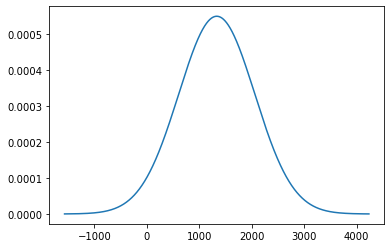

In [4]:
p_mean = 1332
p_sd = 725

lower_p=p_mean-4*p_sd
upper_p=p_mean+4*p_sd

norm_p=np.arange(lower_p,upper_p)
plt.plot(norm_p, norm.pdf(norm_p, p_mean, p_sd));

In [5]:
z_c1 = (100-1332)/725
z_c2 = (700-1332)/725

In [6]:
a = norm.cdf(100,1332,725 )
b = norm.cdf(700,1332,725)
print( 'Propotion of tax return are less than $100: ', a)
print( 'Propotion of tax return are greater than $700: ', b)
c = b-a
print( 'Propotion of tax return between $100 and $700: ', c.round(5))



Propotion of tax return are less than $100:  0.04463036222315338
Propotion of tax return are greater than $700:  0.19167944440584644
Propotion of tax return between $100 and $700:  0.14705


# TASK2

In [7]:
data = pd.read_csv('DS1_C5_S5_Continuous_Practice_Computers_Data.csv')

# i

In [8]:
Filter_data = data[['price','screen']][data['price']<=4000]

In [9]:
Filter_data

,price,screen
0,1499,14
1,1795,14
2,1595,15
3,1849,14
4,3295,14
...,...,...
6254,1690,15
6255,2223,15
6256,2654,15
6257,2195,15


# ii

In [10]:
Filter_data_gb=Filter_data.groupby('screen')

In [11]:
Filter_data_gb

# iii

In [12]:
stnd_dev = st.stdev(Filter_data['price'])
mean = st.mean(Filter_data['price'])


# a

In [13]:
z1 = (2700-mean)/stnd_dev
z1

0.8762593672449527

In [14]:
p = 1-norm.cdf(z1,mean,stnd_dev)
print('Probability computer price greater than 2700 in sample is: ', p)

Probability computer price greater than 2700 in sample is:  0.9999591391248267


# b

In [15]:
z2 = (1301-mean)/stnd_dev
z2 

-1.6197207181256998

In [16]:
p = norm.cdf(z2,mean,stnd_dev)
print('Probability computer price less than 1301 in sample is: ', p.round(5))

Probability computer price less than 1301 in sample is:  4e-05


# c

In [17]:
z_C_1 = (2900-mean)/stnd_dev
p1 = 1-norm.cdf(z_C_1,mean,stnd_dev)
p1

0.99995903057413

In [18]:
z_C_2 = (2000-mean)/stnd_dev
p2 = norm.cdf(z_C_2,mean,stnd_dev)
p2

4.048308464138985e-05

In [19]:
print( 'Probability that computer price between $2000 and $2900: ', (1 - (p1+p2)).round(7))

Probability that computer price between $2000 and $2900:  5e-07


# TASK 2 Contd.

# a

In [20]:
grouped_d_df=data.groupby(['screen'])
dep=data.screen.unique()
Strat_Sample_df=pd.DataFrame()
for d in dep:
    d_data=grouped_d_df.get_group(d)
    sample_data=d_data.sample(frac=.1,replace=True, random_state=1)
    Strat_Sample_df=Strat_Sample_df.append(sample_data, ignore_index=True)
Strat_Sample_df

C:\Users\yogesh\AppData\Local\Temp\ipykernel_14804\1017348171.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Strat_Sample_df=Strat_Sample_df.append(sample_data, ignore_index=True)


,index,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1518,1644,33,107,2,14,no,no,yes,283,10
1,317,2399,66,120,4,14,no,no,yes,108,4
2,1563,2374,33,120,4,14,yes,no,no,283,10
3,1292,1790,33,107,2,14,no,no,yes,246,9
4,4229,2015,66,425,8,14,yes,yes,yes,225,19
...,...,...,...,...,...,...,...,...,...,...,...
621,359,3125,66,250,8,17,no,no,yes,108,4
622,1841,2095,33,212,4,17,no,no,yes,259,11
623,3717,2295,66,340,8,17,no,no,yes,339,17
624,4693,2690,33,720,16,17,yes,no,yes,205,21


# b

In [21]:

data_s=Strat_Sample_df['price'].tolist()
 
s_mean = st.mean(data_s) 
s_median = st.median(data_s) 
s_sd = st.stdev(data_s)

print("Sample Mean ="+str(s_mean)) 
print("Sample Median ="+str(s_median))
print("Sample SD ="+str(s_sd))
print("Shewness ="+str(sts.skew(data_s,bias=False)))
print("Kurtosis ="+str(sts.kurtosis(data_s,bias=False)))

Sample Mean =2196.1373801916934
Sample Median =2131.5
Sample SD =565.7470617656671
Shewness =0.5422845686478731
Kurtosis =0.045036780238616014


In [22]:
data_p=data['price'].tolist()
 
p_mean = st.mean(data_s) 
p_median = st.median(data_s) 
p_sd = st.stdev(data_s)

print("Sample Mean ="+str(p_mean)) 
print("Sample Median ="+str(p_median))
print("Sample SD ="+str(p_sd))
print("Shewness ="+str(sts.skew(data_p,bias=False)))
print("Kurtosis ="+str(sts.kurtosis(data_p,bias=False)))

Sample Mean =2196.1373801916934
Sample Median =2131.5
Sample SD =565.7470617656671
Shewness =0.7117247480608602
Kurtosis =0.7304170367653207


# c

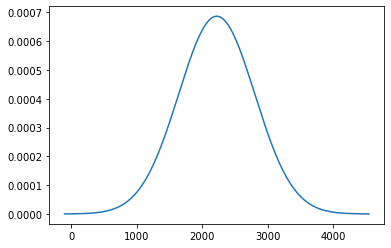

In [23]:
p_mean = st.mean(data['price']) 
p_sd = st.stdev(data['price']) 

lower_p=p_mean-4*p_sd
upper_p=p_mean+4*p_sd

norm_p=np.arange(lower_p,upper_p)
plt.plot(norm_p, norm.pdf(norm_p, p_mean, p_sd));

# d

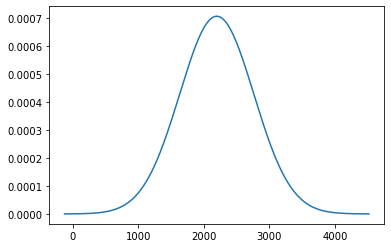

In [24]:
s_mean = st.mean(Strat_Sample_df['price']) 
s_sd = st.stdev(Strat_Sample_df['price']) 

lower_p=s_mean-4*p_sd
upper_p=s_mean+4*p_sd

norm_s=np.arange(lower_p,upper_p)
plt.plot(norm_s, norm.pdf(norm_s, s_mean, s_sd));

# e

In [25]:
z_score = (2900-mean)/stnd_dev

In [26]:
lst = []
s_mean = st.mean(Strat_Sample_df['price']) 
s_sd = st.stdev(Strat_Sample_df['price'])
for i in Strat_Sample_df['price']:
    lst.append((i-s_mean)/s_sd)
lst 

[-0.9759438758170504,
 0.3585747651524392,
 0.31438540617993954,
 -0.7178780194176525,
 -0.32017378866515556,
 -0.260076260462556,
 -0.17876783995315665,
 -0.34845497840755535,
 0.9683879189729344,
 -0.6224290040370531,
 1.7620288061190283,
 -1.2393124552931485,
 -0.8787272860775512,
 -1.3117830040080478,
 -0.0037779784220580087,
 -1.0625550194031497,
 -0.26891413225705596,
 -0.0020104040631580226,
 -1.2393124552931485,
 -0.01261585021655794,
 -0.34845497840755535,
 1.403211211262331,
 -1.02720353222515,
 -1.152701311707049,
 -0.7991864399270519,
 -0.6135911322425532,
 0.2878717907964397,
 -1.5928273270731457,
 0.7014841907790365,
 -0.0020104040631580226,
 1.403211211262331,
 -0.18053541431205664,
 1.0567666369179338,
 0.08460073952294131,
 0.7916304830829358,
 0.5282619036068379,
 -0.8857975835131512,
 1.2335240728079324,
 0.1747470318268406,
 -1.0554847219675498,
 -0.6224290040370531,
 -1.416069891183147,
 0.43104531386733863,
 -0.9741763014581505,
 0.3691802113058391,
 1.85217509842

# f

In [27]:
p_lst = []
for i in lst:
    p_lst.append(norm.pdf(i,s_mean,s_sd ))
p_lst

[3.7433701898386856e-07,
 3.777809425401191e-07,
 3.7766643337081493e-07,
 3.7500070149217274e-07,
 3.7602565139618787e-07,
 3.761807600034632e-07,
 3.763907079087323e-07,
 3.75952679773891e-07,
 3.7936448286039996e-07,
 3.752464513031828e-07,
 3.8143466144986027e-07,
 3.7366083003508227e-07,
 3.7458690750765795e-07,
 3.7347496480667164e-07,
 3.7684292344770423e-07,
 3.741145221399355e-07,
 3.761579461683176e-07,
 3.7684749386814027e-07,
 3.7366083003508227e-07,
 3.768200721217884e-07,
 3.75952679773891e-07,
 3.804973982365076e-07,
 3.7420532225995953e-07,
 3.7388307493815e-07,
 3.7479147759357204e-07,
 3.7526921351965593e-07,
 3.7759774342440206e-07,
 3.727549865898545e-07,
 3.7867063604962233e-07,
 3.7684749386814027e-07,
 3.804973982365076e-07,
 3.7638614266080887e-07,
 3.7959449491301255e-07,
 3.770715078766523e-07,
 3.789048490525282e-07,
 3.782209590403855e-07,
 3.745687285463538e-07,
 3.800549096539138e-07,
 3.773047973506811e-07,
 3.7413268051803874e-07,
 3.752464513031828e-07,

# g

In [28]:
standard_data = []
for x in norm_s:
    zs=(x-s_mean)/s_sd
    standard_data.append(zs)

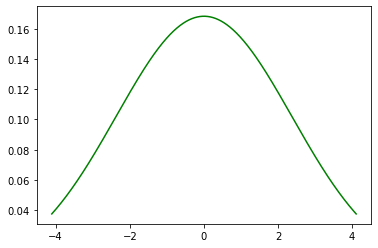

In [29]:
x_all = np.arange(standard_data[0], standard_data[-1], 0.01)
plt.plot(standard_data, norm.pdf(standard_data, st.mean(standard_data), st.stdev(standard_data)), color="green");

In [30]:
z1 = (2700-mean)/stnd_dev
z2 = (1301-mean)/stnd_dev
z_c1 = (100-1332)/725
z_c2 = (700-1332)/725

In [31]:
print('Probability computer price greater than 2700 in sample is: ', p)
print('Probability computer price less than 1301 in sample is: ', p.round(5))
print( 'Probability that computer price between $2000 and $2900: ', (1 - (p1+p2)).round(7))

Probability computer price greater than 2700 in sample is:  4.010913009375642e-05
Probability computer price less than 1301 in sample is:  4e-05
Probability that computer price between $2000 and $2900:  5e-07
